# Libaries

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import re
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram
import requests
from io import StringIO
import time
from sklearn.cluster import AgglomerativeClustering, AffinityPropagation
from scipy.spatial.distance import pdist, squareform
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.mixture import GaussianMixture

## Removing column display limits

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Dataset

## Outcome dataset

In [4]:
df_outcome = pd.read_csv('Austin_Animal_Center_Outcomes_20250227.csv')

In [5]:
df_outcome.head()

Animal ID       Name                DateTime MonthYear Date of Birth  \
0   A882831  *Hamilton  07/01/2023 06:12:00 PM  Jul 2023    03/25/2023   
1   A794011      Chunk  05/08/2019 06:20:00 PM  May 2019    05/02/2017   
2   A776359      Gizmo  07/18/2018 04:02:00 PM  Jul 2018    07/12/2017   
3   A821648        NaN  08/16/2020 11:38:00 AM  Aug 2020    08/16/2019   
4   A720371      Moose  02/13/2016 05:59:00 PM  Feb 2016    10/08/2015   

  Outcome Type Outcome Subtype Animal Type Sex upon Outcome Age upon Outcome  \
0     Adoption             NaN         Cat    Neutered Male         3 months   
1    Rto-Adopt             NaN         Cat    Neutered Male          2 years   
2     Adoption             NaN         Dog    Neutered Male           1 year   
3   Euthanasia             NaN       Other          Unknown           1 year   
4     Adoption             NaN         Dog    Neutered Male         4 months   

                                Breed              Color  
0              Domestic Shorthair Mix        Black/White  
1              Domestic Shorthair Mix  Brown Tabby/White  
2             Chihuahua Shorthair Mix        White/Brown  
3                             Raccoon               Gray  
4  Anatol Shepherd/Labrador Retriever               Buff

In [6]:
df_outcome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171860 entries, 0 to 171859
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         171860 non-null  object
 1   Name              122679 non-null  object
 2   DateTime          171860 non-null  object
 3   MonthYear         171860 non-null  object
 4   Date of Birth     171860 non-null  object
 5   Outcome Type      171818 non-null  object
 6   Outcome Subtype   78729 non-null   object
 7   Animal Type       171860 non-null  object
 8   Sex upon Outcome  171858 non-null  object
 9   Age upon Outcome  171848 non-null  object
 10  Breed             171860 non-null  object
 11  Color             171860 non-null  object
dtypes: object(12)
memory usage: 15.7+ MB


## Intake dataset

In [7]:
df_intake = pd.read_csv('Austin_Animal_Center_Intakes_20250227.csv')

In [8]:
df_intake.head()

Animal ID          Name                DateTime     MonthYear  \
0   A786884        *Brock  01/03/2019 04:19:00 PM  January 2019   
1   A706918         Belle  07/05/2015 12:59:00 PM     July 2015   
2   A724273       Runster  04/14/2016 06:43:00 PM    April 2016   
3   A665644           NaN  10/21/2013 07:59:00 AM  October 2013   
4   A857105  Johnny Ringo  05/12/2022 12:23:00 AM      May 2022   

                        Found Location    Intake Type Intake Condition  \
0  2501 Magin Meadow Dr in Austin (TX)          Stray           Normal   
1     9409 Bluegrass Dr in Austin (TX)          Stray           Normal   
2   2818 Palomino Trail in Austin (TX)          Stray           Normal   
3                          Austin (TX)          Stray             Sick   
4   4404 Sarasota Drive in Austin (TX)  Public Assist           Normal   

  Animal Type Sex upon Intake Age upon Intake                     Breed  \
0         Dog   Neutered Male         2 years                Beagle Mix   
1         Dog   Spayed Female         8 years  English Springer Spaniel   
2         Dog     Intact Male       11 months               Basenji Mix   
3         Cat   Intact Female         4 weeks    Domestic Shorthair Mix   
4         Cat   Neutered Male         2 years        Domestic Shorthair   

          Color  
0      Tricolor  
1   White/Liver  
2   Sable/White  
3        Calico  
4  Orange Tabby

In [9]:
df_intake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171731 entries, 0 to 171730
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         171731 non-null  object
 1   Name              122432 non-null  object
 2   DateTime          171731 non-null  object
 3   MonthYear         171731 non-null  object
 4   Found Location    171731 non-null  object
 5   Intake Type       171731 non-null  object
 6   Intake Condition  171731 non-null  object
 7   Animal Type       171731 non-null  object
 8   Sex upon Intake   171729 non-null  object
 9   Age upon Intake   171730 non-null  object
 10  Breed             171731 non-null  object
 11  Color             171731 non-null  object
dtypes: object(12)
memory usage: 15.7+ MB


## Tranformed dataset

In [10]:
#df = pd.read_csv('data_transformed.csv')

In [11]:
#df.head()

## Merged dataset between intake & outcome

In [12]:
print("Duplicate animal_id count in intake:", df_intake['Animal ID'].duplicated().sum())
print("Duplicate animal_id count in outcome:", df_outcome['Animal ID'].duplicated().sum())


Duplicate animal_id count in intake: 17351
Duplicate animal_id count in outcome: 17360


In [13]:
df_intake = df_intake.drop_duplicates(subset=['Animal ID'])
df_outcome = df_outcome.drop_duplicates(subset=['Animal ID'])


In [14]:
df = df_intake.merge(df_outcome, on='Animal ID', how = 'inner')

In [15]:
df.head(10)

Animal ID        Name_x              DateTime_x    MonthYear_x  \
0   A786884        *Brock  01/03/2019 04:19:00 PM   January 2019   
1   A706918         Belle  07/05/2015 12:59:00 PM      July 2015   
2   A724273       Runster  04/14/2016 06:43:00 PM     April 2016   
3   A665644           NaN  10/21/2013 07:59:00 AM   October 2013   
4   A857105  Johnny Ringo  05/12/2022 12:23:00 AM       May 2022   
5   A682524           Rio  06/29/2014 10:38:00 AM      June 2014   
6   A743852          Odin  02/18/2017 12:46:00 PM  February 2017   
7   A635072       Beowulf  04/16/2019 09:53:00 AM     April 2019   
8   A844350         *Ella  10/15/2021 11:40:00 AM   October 2021   
9   A708452        Mumble  07/30/2015 02:37:00 PM      July 2015   

                                  Found Location      Intake Type  \
0            2501 Magin Meadow Dr in Austin (TX)            Stray   
1               9409 Bluegrass Dr in Austin (TX)            Stray   
2             2818 Palomino Trail in Austin (TX)            Stray   
3                                    Austin (TX)            Stray   
4             4404 Sarasota Drive in Austin (TX)    Public Assist   
5                  800 Grove Blvd in Austin (TX)            Stray   
6                                    Austin (TX)  Owner Surrender   
7            415 East Mary Street in Austin (TX)    Public Assist   
8  2112 East William Cannon Drive in Austin (TX)            Stray   
9                                    Austin (TX)    Public Assist   

  Intake Condition Animal Type_x Sex upon Intake Age upon Intake  \
0           Normal           Dog   Neutered Male         2 years   
1           Normal           Dog   Spayed Female         8 years   
2           Normal           Dog     Intact Male       11 months   
3             Sick           Cat   Intact Female         4 weeks   
4           Normal           Cat   Neutered Male         2 years   
5           Normal           Dog   Neutered Male         4 years   
6           Normal           Dog   Neutered Male         2 years   
7           Normal           Dog   Neutered Male         6 years   
8           Normal           Cat   Intact Female        6 months   
9           Normal           Dog     Intact Male         2 years   

                                 Breed_x       Color_x        Name_y  \
0                             Beagle Mix      Tricolor        *Brock   
1               English Springer Spaniel   White/Liver         Belle   
2                            Basenji Mix   Sable/White       Runster   
3                 Domestic Shorthair Mix        Calico           NaN   
4                     Domestic Shorthair  Orange Tabby  Johnny Ringo   
5  Doberman Pinsch/Australian Cattle Dog      Tan/Gray           Rio   
6                 Labrador Retriever Mix     Chocolate          Odin   
7                         Great Dane Mix         Black       Beowulf   
8                     Domestic Shorthair   Brown Tabby         *Ella   
9                 Labrador Retriever Mix   Black/White        Mumble   

               DateTime_y MonthYear_y Date of Birth     Outcome Type  \
0  01/08/2019 03:11:00 PM    Jan 2019    01/03/2017         Transfer   
1  07/05/2015 03:13:00 PM    Jul 2015    07/05/2007  Return to Owner   
2  04/21/2016 05:17:00 PM    Apr 2016    04/17/2015  Return to Owner   
3  10/21/2013 11:39:00 AM    Oct 2013    09/21/2013         Transfer   
4  05/12/2022 02:35:00 PM    May 2022    05/12/2020         Transfer   
5  07/02/2014 02:16:00 PM    Jul 2014    06/29/2010  Return to Owner   
6  02/21/2017 05:44:00 PM    Feb 2017    02/18/2015  Return to Owner   
7  04/18/2019 01:45:00 PM    Apr 2019    06/03/2012  Return to Owner   
8  10/20/2021 06:51:00 PM    Oct 2021    04/15/2021         Adoption   
9  08/04/2015 06:17:00 PM    Aug 2015    07/28/2013  Return to Owner   

  Outcome Subtype Animal Type_y Sex upon Outcome Age upon Outcome  \
0         Partner           Dog    Neutered Male          2 years   
1             NaN   

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153686 entries, 0 to 153685
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         153686 non-null  object
 1   Name_x            105028 non-null  object
 2   DateTime_x        153686 non-null  object
 3   MonthYear_x       153686 non-null  object
 4   Found Location    153686 non-null  object
 5   Intake Type       153686 non-null  object
 6   Intake Condition  153686 non-null  object
 7   Animal Type_x     153686 non-null  object
 8   Sex upon Intake   153684 non-null  object
 9   Age upon Intake   153685 non-null  object
 10  Breed_x           153686 non-null  object
 11  Color_x           153686 non-null  object
 12  Name_y            105028 non-null  object
 13  DateTime_y        153686 non-null  object
 14  MonthYear_y       153686 non-null  object
 15  Date of Birth     153686 non-null  object
 16  Outcome Type      153652 non-null  obj

1. Convert datetime_x, datetime2, datetime_y into datetime64
2. Convert 

### Missing matrix

<Axes: >

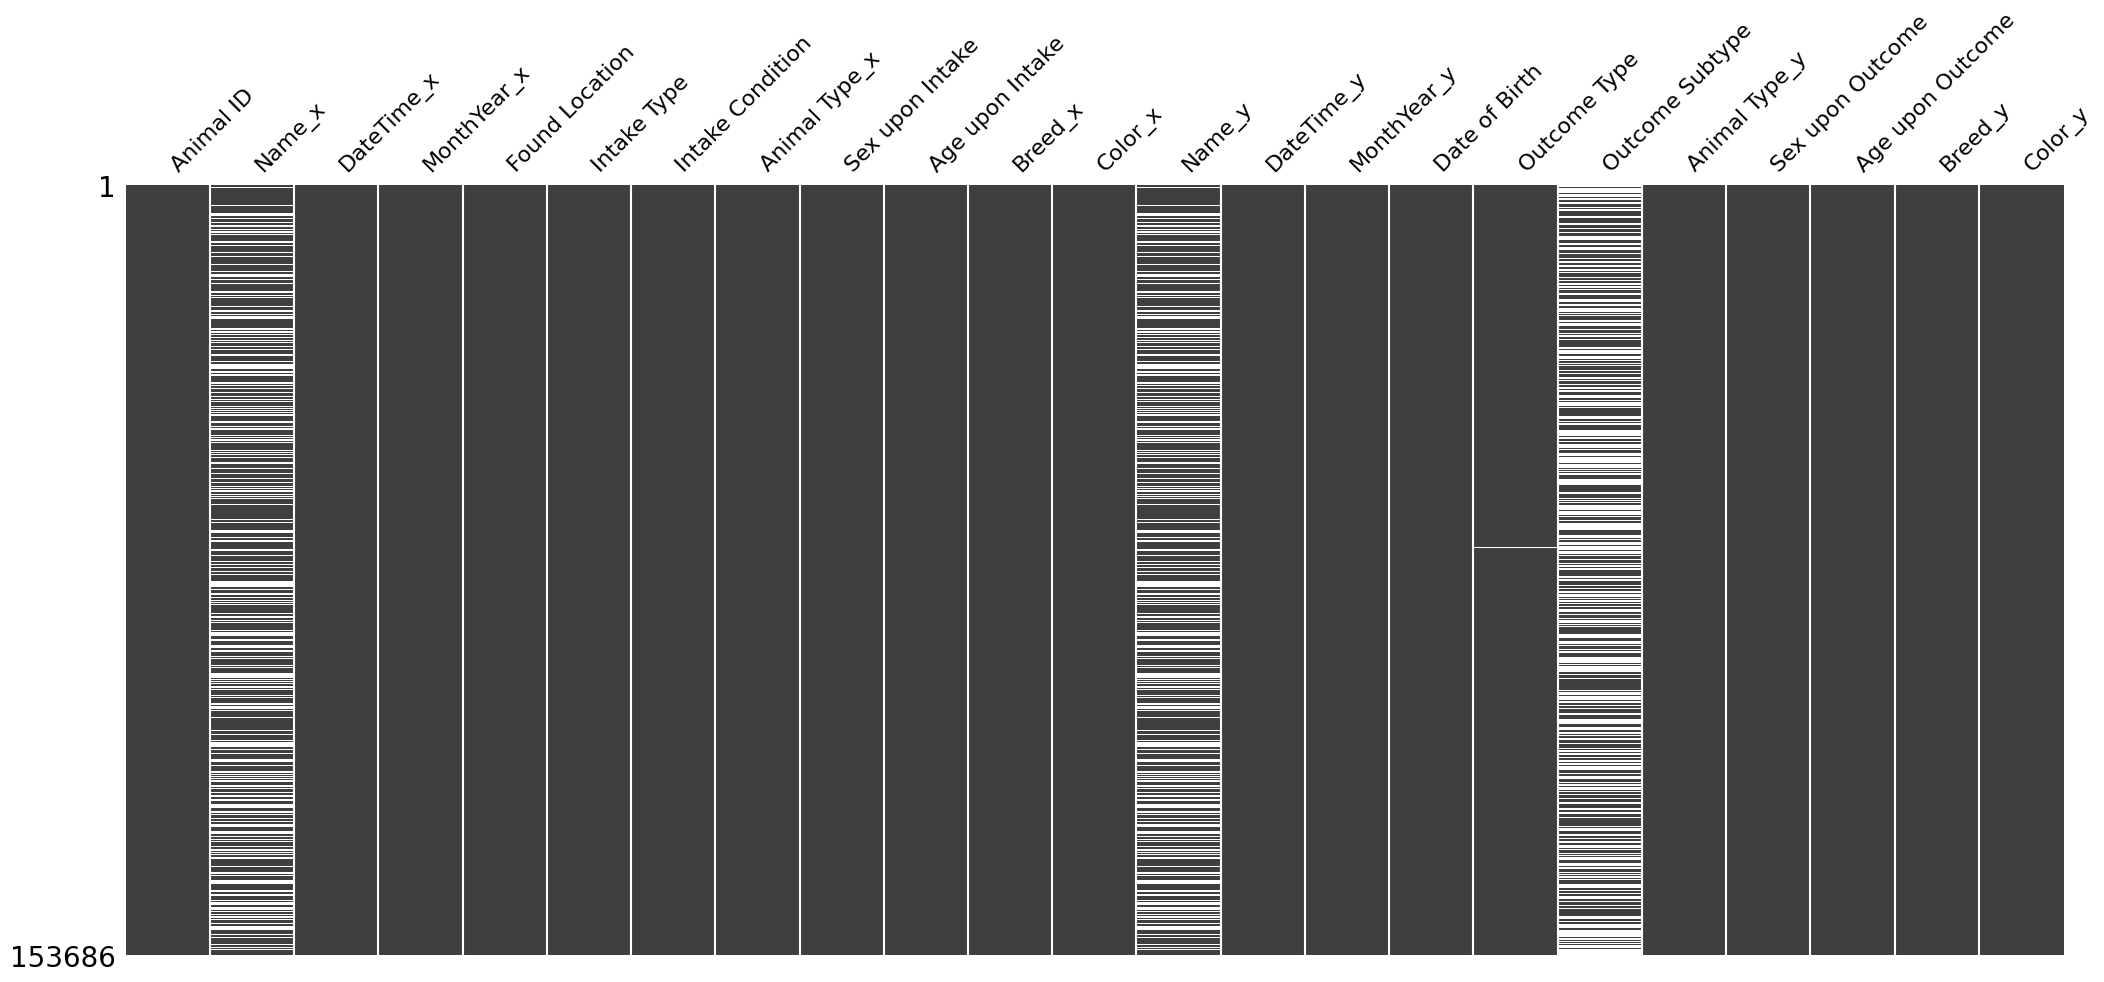

In [17]:
import missingno as msno
msno.matrix(df, labels=True, sparkline=False)

### Dropping columns with duplicating information and repititive information

In [18]:
# Drop outcome_subtype, datetime2, breed_x, color_x, animal_type_x, name_x,, name_y
df = df.drop(columns=['Outcome Subtype', 'MonthYear_x', 'Breed_x', 'Color_x', 'Animal Type_x', 'Name_x', 'Name_y','MonthYear_y', ])

In [19]:
df.head()

Animal ID              DateTime_x                       Found Location  \
0   A786884  01/03/2019 04:19:00 PM  2501 Magin Meadow Dr in Austin (TX)   
1   A706918  07/05/2015 12:59:00 PM     9409 Bluegrass Dr in Austin (TX)   
2   A724273  04/14/2016 06:43:00 PM   2818 Palomino Trail in Austin (TX)   
3   A665644  10/21/2013 07:59:00 AM                          Austin (TX)   
4   A857105  05/12/2022 12:23:00 AM   4404 Sarasota Drive in Austin (TX)   

     Intake Type Intake Condition Sex upon Intake Age upon Intake  \
0          Stray           Normal   Neutered Male         2 years   
1          Stray           Normal   Spayed Female         8 years   
2          Stray           Normal     Intact Male       11 months   
3          Stray             Sick   Intact Female         4 weeks   
4  Public Assist           Normal   Neutered Male         2 years   

               DateTime_y Date of Birth     Outcome Type Animal Type_y  \
0  01/08/2019 03:11:00 PM    01/03/2017         Transfer           Dog   
1  07/05/2015 03:13:00 PM    07/05/2007  Return to Owner           Dog   
2  04/21/2016 05:17:00 PM    04/17/2015  Return to Owner           Dog   
3  10/21/2013 11:39:00 AM    09/21/2013         Transfer           Cat   
4  05/12/2022 02:35:00 PM    05/12/2020         Transfer           Cat   

  Sex upon Outcome Age upon Outcome                   Breed_y       Color_y  
0    Neutered Male          2 years                Beagle Mix      Tricolor  
1    Spayed Female          8 years  English Springer Spaniel   White/Liver  
2    Neutered Male           1 year               Basenji Mix   Sable/White  
3    Intact Female          4 weeks    Domestic Shorthair Mix        Calico  
4    Neutered Male          2 years        Domestic Shorthair  Orange Tabby

### Converting into datetime64

In [20]:
# Convert all datetime columns
datetime_columns = ['DateTime_x', 'DateTime_y', 'Date of Birth']
df[datetime_columns] = df[datetime_columns].apply(pd.to_datetime)

# Display the DataFrame to confirm conversion
print(df.dtypes)

/var/folders/vv/lxk5p8wx097gv6r501nn13tw0000gn/T/ipykernel_12645/3700598531.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[datetime_columns] = df[datetime_columns].apply(pd.to_datetime)
/var/folders/vv/lxk5p8wx097gv6r501nn13tw0000gn/T/ipykernel_12645/3700598531.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[datetime_columns] = df[datetime_columns].apply(pd.to_datetime)


Animal ID                   object
DateTime_x          datetime64[ns]
Found Location              object
Intake Type                 object
Intake Condition            object
Sex upon Intake             object
Age upon Intake             object
DateTime_y          datetime64[ns]
Date of Birth       datetime64[ns]
Outcome Type                object
Animal Type_y               object
Sex upon Outcome            object
Age upon Outcome            object
Breed_y                     object
Color_y                     object
dtype: object


## A Look at df

In [21]:
df.head()

Animal ID          DateTime_x                       Found Location  \
0   A786884 2019-01-03 16:19:00  2501 Magin Meadow Dr in Austin (TX)   
1   A706918 2015-07-05 12:59:00     9409 Bluegrass Dr in Austin (TX)   
2   A724273 2016-04-14 18:43:00   2818 Palomino Trail in Austin (TX)   
3   A665644 2013-10-21 07:59:00                          Austin (TX)   
4   A857105 2022-05-12 00:23:00   4404 Sarasota Drive in Austin (TX)   

     Intake Type Intake Condition Sex upon Intake Age upon Intake  \
0          Stray           Normal   Neutered Male         2 years   
1          Stray           Normal   Spayed Female         8 years   
2          Stray           Normal     Intact Male       11 months   
3          Stray             Sick   Intact Female         4 weeks   
4  Public Assist           Normal   Neutered Male         2 years   

           DateTime_y Date of Birth     Outcome Type Animal Type_y  \
0 2019-01-08 15:11:00    2017-01-03         Transfer           Dog   
1 2015-07-05 15:13:00    2007-07-05  Return to Owner           Dog   
2 2016-04-21 17:17:00    2015-04-17  Return to Owner           Dog   
3 2013-10-21 11:39:00    2013-09-21         Transfer           Cat   
4 2022-05-12 14:35:00    2020-05-12         Transfer           Cat   

  Sex upon Outcome Age upon Outcome                   Breed_y       Color_y  
0    Neutered Male          2 years                Beagle Mix      Tricolor  
1    Spayed Female          8 years  English Springer Spaniel   White/Liver  
2    Neutered Male           1 year               Basenji Mix   Sable/White  
3    Intact Female          4 weeks    Domestic Shorthair Mix        Calico  
4    Neutered Male          2 years        Domestic Shorthair  Orange Tabby

In [22]:
df['time_to_outcome'] = df['DateTime_y'] - df['DateTime_x']
df.rename(columns={'DateTime_x': 'Date_of_Intake'}, inplace=True)
df.rename(columns={'DateTime_y': 'Date_of_Outcome'}, inplace=True)

In [23]:
df.rename(columns={'Animal Type_y': 'animal_type'}, inplace=True)

In [24]:
df.rename(columns = {'Color_y': 'color'}, inplace=True)

In [25]:
df.rename(columns={'Breed_y': 'breed'}, inplace=True)

### Convert time_to_outcome to timedelta format

In [26]:
# Convert time_to_outcome to timedelta format
df['time_to_outcome'] = pd.to_timedelta(df['time_to_outcome'])

# Convert timedelta to total minutes
df['time_to_outcome_minutes'] = df['time_to_outcome'].dt.total_seconds() / 60

# Preliminary EDA before clustering

## Animal Type count

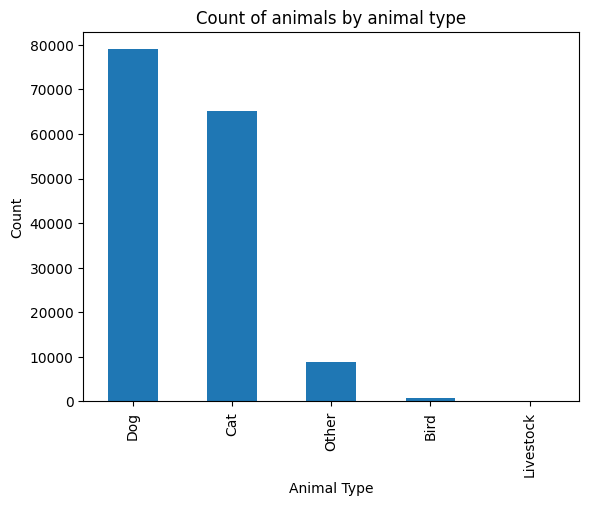

In [27]:
# Bar chart for count of animals by animal_type
df['animal_type'].value_counts().plot(kind='bar')
plt.title('Count of animals by animal type')
plt.xlabel('Animal Type')
plt.ylabel('Count')
plt.show()

## Animal Intake type counts

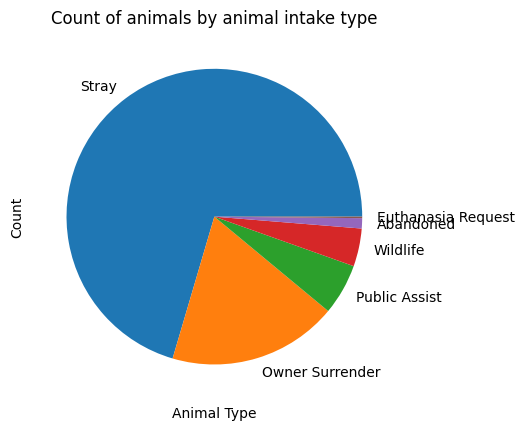

In [28]:
# Bar chart for count of animals by intake_type
df['Intake Type'].value_counts().plot(kind='pie')
plt.title('Count of animals by animal intake type')
plt.xlabel('Animal Type')
plt.ylabel('Count')
plt.show()

## Intake condition

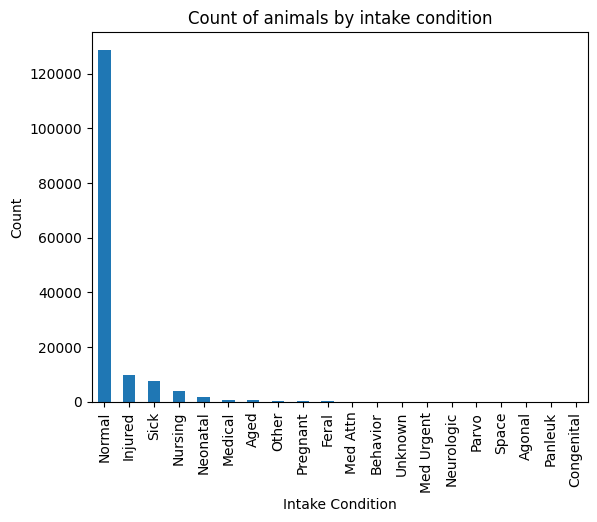

In [29]:
# Bar chart for count of animals by intake condition
df['Intake Condition'].value_counts().plot(kind='bar')
plt.title('Count of animals by intake condition')
plt.xlabel('Intake Condition')
plt.ylabel('Count')
plt.show()


## Found_location fixing

In [30]:
# How many unique values in found_location
# How many unique values in found_location
found_location = df['Found Location'].unique()
print(len(found_location))
print(found_location)

64081
['2501 Magin Meadow Dr in Austin (TX)' '9409 Bluegrass Dr in Austin (TX)'
 '2818 Palomino Trail in Austin (TX)' ... '2215 Post in Austin (TX)'
 'Corner Of Sendero Hills Parkway And Cordoba Drive in Austin (TX)'
 'Willam B Travis Building Floor 8 1701 Congress Ave in Austin (TX)']


In [31]:
# Assuming your data is in a DataFrame called 'df'
unique_locations = df['Found Location'].unique()

# Print the unique locations
print("Unique found locations:")
print(unique_locations)

# If you want to know how many unique locations there are
print(f"\nNumber of unique locations: {len(unique_locations)}")

# If you want to see the count of animals found at each location
location_counts = df['Found Location'].value_counts()
print("\nCount of animals by location:")
print(location_counts)

Unique found locations:
['2501 Magin Meadow Dr in Austin (TX)' '9409 Bluegrass Dr in Austin (TX)'
 '2818 Palomino Trail in Austin (TX)' ... '2215 Post in Austin (TX)'
 'Corner Of Sendero Hills Parkway And Cordoba Drive in Austin (TX)'
 'Willam B Travis Building Floor 8 1701 Congress Ave in Austin (TX)']

Number of unique locations: 64081

Count of animals by location:
Found Location
Austin (TX)                                                                              25745
Travis (TX)                                                                               3272
7201 Levander Loop in Austin (TX)                                                         1440
Outside Jurisdiction                                                                      1372
Manor (TX)                                                                                 626
Pflugerville (TX)                                                                          547
Del Valle (TX)                              

### Cleaning the found_location variable

In [32]:
def clean_location(location):
    if pd.isna(location):  # Handle missing values
        return location

    # Check if the pattern "in X" exists
    if " in " in location:
        # Extract what comes after "in "
        return location.split(" in ")[1]
    else:
        # Keep the original value for entries that don't match the pattern
        return location

# Apply the function to create a new clean_location column
df['clean_location'] = df['Found Location'].apply(clean_location)

# Let's check the unique values in the new column
unique_clean_locations = df['clean_location'].unique()
print("Sample of cleaned unique locations:")
print(unique_clean_locations[:20])  # Print first 20 unique locations

# Count frequency of each cleaned location
location_counts = df['clean_location'].value_counts()
print("\nTop 10 most common cleaned locations:")
print(location_counts.head(20))

Sample of cleaned unique locations:
['Austin (TX)' 'Travis (TX)' 'Manor (TX)' 'Outside Jurisdiction'
 'Del Valle (TX)' 'Pflugerville (TX)' 'Lakeway (TX)' 'Mustang Ridge (TX)'
 'Leander (TX)' 'Webberville (TX)' 'Jonestown (TX)' 'Rollingwood (TX)'
 'Creedmoor (TX)' 'Lago Vista (TX)' 'Round Rock (TX)' 'Bastrop (TX)'
 'Williamson (TX)' 'Cedar Park (TX)' 'Village Ot Hill (TX)'
 'Point Venture (TX)']

Top 10 most common cleaned locations:
clean_location
Austin (TX)             126011
Travis (TX)              17633
Manor (TX)                2959
Del Valle (TX)            2113
Pflugerville (TX)         1893
Outside Jurisdiction      1372
Leander (TX)               334
Lago Vista (TX)            206
Cedar Park (TX)            160
Lakeway (TX)               146
Creedmoor (TX)             143
Jonestown (TX)             122
Mustang Ridge (TX)          91
Round Rock (TX)             83
Hays (TX)                   82
Bastrop (TX)                78
Williamson (TX)             61
Bee Cave (TX)        

Massive class imbalances exist here with most pets coming from Austin, and Travis.

## Unique values in age_upon_intake

### Cleaning this data to convert all ages to days

In [33]:
def convert_age_to_days(age_str):
    if pd.isna(age_str):
        return None

    # Convert to lowercase and remove any leading/trailing spaces
    age_str = str(age_str).lower().strip()

    # Extract the number and unit using regex
    match = re.search(r'(\d+\.?\d*)\s*(\w+)', age_str)
    if not match:
        return None

    value = float(match.group(1))
    unit = match.group(2)

    # Handle different units, checking for both singular and plural forms
    if unit in ['day', 'days']:
        return value
    elif unit in ['week', 'weeks']:
        return value * 7
    elif unit in ['month', 'months']:
        return value * 30.44  # Average days in a month
    elif unit in ['year', 'years']:
        return value * 365.25  # Account for leap years
    else:
        return None  # Unknown unit

# Apply the function to your age column
# Assuming your column is named 'age_upon_intake' or 'age_upon_outcome'
df['age_days'] = df['Age upon Intake'].apply(convert_age_to_days)

# Check the results with a few examples
test_examples = pd.DataFrame({
    'Age upon Intake': ['2 days', '1 day', '6 weeks', '1 week', '3 months', '1 month', '5 years', '1 year']
})
test_examples['age_days'] = test_examples['Age upon Intake'].apply(convert_age_to_days)
print(test_examples)

  Age upon Intake  age_days
0          2 days      2.00
1           1 day      1.00
2         6 weeks     42.00
3          1 week      7.00
4        3 months     91.32
5         1 month     30.44
6         5 years   1826.25
7          1 year    365.25


In [34]:
df['age_days'].describe()

count    153685.000000
mean        678.079014
std        1015.612201
min           0.000000
25%          30.440000
50%         365.250000
75%         730.500000
max       10957.500000
Name: age_days, dtype: float64

## Average days for each outcome_type

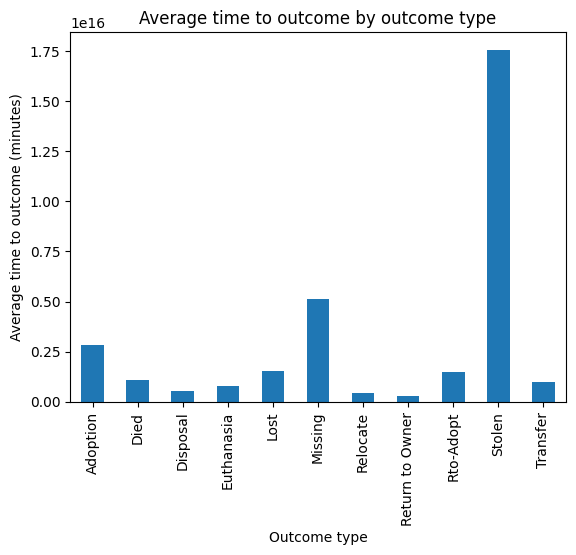

In [35]:
# Plot for average time for outcome_type
df.groupby('Outcome Type')['time_to_outcome'].mean().plot(kind='bar')
plt.title('Average time to outcome by outcome type')
plt.xlabel('Outcome type')
plt.ylabel('Average time to outcome (minutes)')
plt.show()

## Fixing the colour column

In [36]:
def simplify_color(color):
    """
    Simplify the color into broader categories
    """

    # Handle NaN values
    if pd.isna(color):
        return "Unknown"

    # Now it's safe to call lower()
    color = str(color).lower()

    # Black Group
    if any(word in color for word in ['black', 'ebony', 'charcoal']):
        return 'Black'

    # White Group
    elif any(word in color for word in ['white', 'cream', 'ivory', 'pearl', 'platinum']):
        return 'White'

    # Brown Group
    elif any(word in color for word in ['brown', 'brindle', 'chocolate', 'mocha', 'mahogany']):
        return 'Brown'

    # Grey Group
    elif any(word in color for word in ['gray', 'grey', 'blue', 'silver', 'slate', 'pewter', 'ash']):
        return 'Grey'

    # Gold Group
    elif any(word in color for word in ['gold', 'tan', 'yellow', 'fawn', 'buff', 'sandy']):
        return 'Gold'

    # Red Group
    elif any(word in color for word in ['red', 'ginger', 'orange', 'copper', 'auburn']):
        return 'Red'

    # Cream Group
    elif any(word in color for word in ['cream', 'beige', 'off-white']):
        return 'Cream'

    # Tabby Pattern
    elif 'tabby' in color:
        return 'Tabby'

    # Merle Pattern
    elif 'merle' in color:
        return 'Merle'

    # Tricolor Pattern
    elif 'tricolor' in color or ('black' in color and 'tan' in color and 'white' in color):
        return 'Tricolor'

    # Spotted or Speckled Patterns
    elif any(word in color for word in ['spotted', 'speckled', 'ticked', 'roan', 'freckled']):
        return 'Spotted'

    # Mixed or Multiple Colors
    elif '/' in color or 'and' in color:
        return 'Multicolor'

    # Default to Other
    else:
        return 'Other'


In [37]:
# Apply Enhanced Color Grouping
df['color_group'] = df['color'].apply(simplify_color)

In [38]:
df['color_group'].value_counts()

color_group
Black         48535
White         48468
Brown         21074
Other         10963
Grey           8599
Red            6962
Gold           5892
Tricolor       3170
Multicolor       23
Name: count, dtype: int64

## Fixing the outcome column

In [39]:
# Grouping Outcome Types
def group_outcome(outcome):
    if outcome in ['Adoption', 'Return to Owner', 'Rto-Adopt']:
        return 'Positive'
    elif outcome in ['Transfer', 'Relocate']:
        return 'Neutral'
    elif outcome in ['Euthanasia', 'Died', 'Disposal', 'Lost', 'Missing', 'Stolen']:
        return 'Negative'
    else:
        return 'Other'

# Apply Grouping
df['outcome_group'] = df['Outcome Type'].apply(group_outcome)


## Fixing the breed column

In [40]:
# Identify Mix vs Pure
df['breed_type'] = df['breed'].apply(lambda x: 'Mix' if 'Mix' in x else 'Pure')

# Clustering models

In [56]:
# Dropping columns that are not needed: color, found_location, age_upon_intake, day_of_birth, month_of_birth, day_intake, month_intake
df_clustering = df.drop(columns=['color', 'Found Location', 'Age upon Intake', 'Date of Birth','Outcome Type', 'time_to_outcome'])

## Hierarchical Clustering

Clustered Data Sample:
  Animal ID      Date_of_Intake Intake Type Intake Condition Sex upon Intake  \
0   A824437 2020-10-14 14:28:00       Stray           Normal   Intact Female   
1   A515453 2017-08-07 14:23:00       Stray           Normal   Neutered Male   
2   A772170 2018-05-15 15:12:00       Stray           Normal   Spayed Female   
3   A819709 2020-07-04 13:34:00       Stray           Normal   Intact Female   
4   A716634 2015-11-22 13:06:00       Stray           Normal   Intact Female   

      Date_of_Outcome animal_type Sex upon Outcome Age upon Outcome  \
0 2020-10-21 18:39:00         Dog    Spayed Female           1 year   
1 2017-08-07 17:12:00         Dog    Neutered Male         10 years   
2 2018-05-16 17:05:00         Dog    Spayed Female           1 year   
3 2020-07-04 07:37:00         Cat    Intact Female          2 weeks   
4 2015-12-19 18:44:00         Cat    Intact Female         2 months   

                                breed  time_to_outcome_minutes clean_

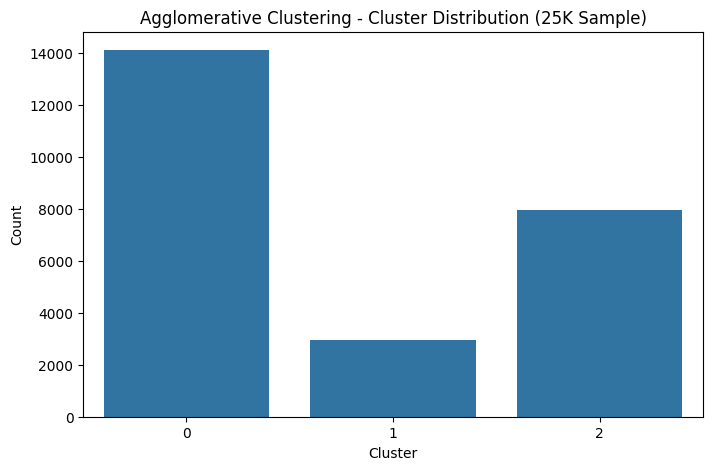

CLUSTER ANALYSIS SUMMARY

📊 CLUSTER 0 PROFILE
Samples: 14104 (56.4% of total)
--------------------------------------------------
📅 AGE PROFILE: Average age: 478.5 days (-199.5 days younger than average)
⏱️ TIME TO OUTCOME: 24.9 days (4.5 days longer than average)

🐾 ANIMAL TYPES:
  • Dog: 75.7% (24.3% higher than dataset average)
  • Cat: 13.3% (29.0% lower than dataset average)
  • Other: 10.1% (4.4% higher than dataset average)

🏁 OUTCOMES:
  • Positive: 66.8% (5.3% higher than dataset average)
  • Neutral: 23.0% (7.0% lower than dataset average)
  • Negative: 10.2% (1.7% higher than dataset average)

🏥 INTAKE CONDITIONS:
  • Normal: 86.5% (2.7% higher than dataset average)
  • Injured: 5.8% (0.7% lower than dataset average)
  • Sick: 4.6% (0.3% lower than dataset average)

📥 INTAKE TYPES:
  • Stray: 55.5%
  • Owner Surrender: 27.0%
  • Public Assist: 8.4%

⚤ SEX DISTRIBUTION:
  • Intact Male: 36.4%
  • Intact Female: 33.9%
  • Neutered Male: 11.0%
  • Unknown: 9.6%
  • Spayed Female

In [96]:
df_sampled = df_clustering.sample(n=25000, random_state=42).reset_index(drop=True)

# Select Features for Clustering
numerical_features = ['time_to_outcome_minutes', 'age_days']
categorical_features = ['animal_type', 'Intake Type', 'Intake Condition', 'color_group', 'outcome_group', 'breed_type']

# Preprocessing Pipelines
num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer([
    ('num', num_transformer, numerical_features),
    ('cat', cat_transformer, categorical_features)
])

# Apply preprocessing
X_transformed = preprocessor.fit_transform(df_sampled)

# Convert to array for clustering
X_array = X_transformed.toarray()

# Compute Distance Matrix (for hierarchical clustering)
distance_matrix = squareform(pdist(X_array, metric='euclidean'))

# Perform Agglomerative Clustering
n_clusters = 3  # Adjust as needed
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
df_sampled['agg_cluster'] = agg_clustering.fit_predict(X_array)

# Save clustered dataset to CSV
df_sampled.to_csv("clustered_animal_shelter_data.csv", index=False)

# Print Clustered Data Sample
print("Clustered Data Sample:")
print(df_sampled.head())

# Visualize Cluster Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=df_sampled['agg_cluster'])
plt.title("Agglomerative Clustering - Cluster Distribution (25K Sample)")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()

# Calculate cluster insights with percentages and comparisons to overall distribution
overall_animal_dist = df['animal_type'].value_counts(normalize=True) * 100
overall_outcome_dist = df['outcome_group'].value_counts(normalize=True) * 100
overall_intake_dist = df['Intake Condition'].value_counts(normalize=True) * 100
overall_age_mean = df['age_days'].mean()
overall_time_to_outcome = df['time_to_outcome_minutes'].mean() / (24 * 60)  # Convert to days

# Replace df_with_clusters with df_sampled and hierarchical_cluster with agg_cluster
print("CLUSTER ANALYSIS SUMMARY")
print("=" * 50)

for cluster in range(n_clusters):
    cluster_data = df_sampled[df_sampled['agg_cluster'] == cluster]
    cluster_size = len(cluster_data)
    cluster_pct = (cluster_size / len(df_sampled)) * 100
    
    print(f"\n📊 CLUSTER {cluster} PROFILE")
    print(f"Samples: {cluster_size} ({cluster_pct:.1f}% of total)")
    print("-" * 50)
    
    # Age analysis
    cluster_age_mean = cluster_data['age_days'].mean()
    age_diff = cluster_age_mean - overall_age_mean
    age_diff_text = f"{age_diff:.1f} days {'older' if age_diff > 0 else 'younger'} than average"
    
    print(f"📅 AGE PROFILE: Average age: {cluster_age_mean:.1f} days ({age_diff_text})")
    
    # Time to outcome analysis
    cluster_time = cluster_data['time_to_outcome_minutes'].mean() / (24 * 60)  # Convert to days
    time_diff = cluster_time - overall_time_to_outcome
    time_diff_text = f"{abs(time_diff):.1f} days {'longer' if time_diff > 0 else 'shorter'} than average"
    print(f"⏱️ TIME TO OUTCOME: {cluster_time:.1f} days ({time_diff_text})")
    
    # Animal type analysis with comparison
    cluster_animal_dist = cluster_data['animal_type'].value_counts(normalize=True) * 100
    print("\n🐾 ANIMAL TYPES:")
    for animal, pct in cluster_animal_dist.head(3).items():
        overall_pct = overall_animal_dist.get(animal, 0)
        diff = pct - overall_pct
        diff_text = f"{abs(diff):.1f}% {'higher' if diff > 0 else 'lower'} than dataset average"
        print(f"  • {animal}: {pct:.1f}% ({diff_text})")
    
    # Outcome analysis with comparison
    cluster_outcome_dist = cluster_data['outcome_group'].value_counts(normalize=True) * 100
    print("\n🏁 OUTCOMES:")
    for outcome, pct in cluster_outcome_dist.head(3).items():
        overall_pct = overall_outcome_dist.get(outcome, 0)
        diff = pct - overall_pct
        diff_text = f"{abs(diff):.1f}% {'higher' if diff > 0 else 'lower'} than dataset average"
        print(f"  • {outcome}: {pct:.1f}% ({diff_text})")
    
    # Intake condition with comparison
    cluster_intake_dist = cluster_data['Intake Condition'].value_counts(normalize=True) * 100
    print("\n🏥 INTAKE CONDITIONS:")
    for condition, pct in cluster_intake_dist.head(3).items():
        overall_pct = overall_intake_dist.get(condition, 0)
        diff = pct - overall_pct
        diff_text = f"{abs(diff):.1f}% {'higher' if diff > 0 else 'lower'} than dataset average"
        print(f"  • {condition}: {pct:.1f}% ({diff_text})")
    
    # Intake type analysis
    intake_dist = cluster_data['Intake Type'].value_counts(normalize=True) * 100
    print("\n📥 INTAKE TYPES:")
    for intake, pct in intake_dist.head(3).items():
        print(f"  • {intake}: {pct:.1f}%")
    
    # Sex distribution
    if 'Sex upon Intake' in cluster_data.columns:
        sex_dist = cluster_data['Sex upon Intake'].value_counts(normalize=True) * 100
        print("\n⚤ SEX DISTRIBUTION:")
        for sex, pct in sex_dist.items():
            print(f"  • {sex}: {pct:.1f}%")
    
    # Breed type analysis
    breed_dist = cluster_data['breed_type'].value_counts(normalize=True) * 100
    print("\n🐕 BREED TYPES:")
    for breed, pct in breed_dist.head(3).items():
        print(f"  • {breed}: {pct:.1f}%")
    
    # Location analysis
    if 'clean_location' in cluster_data.columns:
        top_locations = cluster_data['clean_location'].value_counts(normalize=True).head(3) * 100
        print("\n📍 TOP LOCATIONS:")
        for location, pct in top_locations.items():
            print(f"  • {location}: {pct:.1f}%")
    
    # Color analysis
    color_dist = cluster_data['color_group'].value_counts(normalize=True) * 100
    print("\n🎨 COLOR DISTRIBUTION:")
    for color, pct in color_dist.head(3).items():
        print(f"  • {color}: {pct:.1f}%")
    
    # Cluster summary
    print("\n🔑 KEY INSIGHTS:")
    # Find distinctive features (highest positive differences from overall)
    distinctive_features = []
    
    # Check animal types
    animal_diffs = [(animal, pct - overall_animal_dist.get(animal, 0)) 
                   for animal, pct in cluster_animal_dist.items()]
    animal_diffs.sort(key=lambda x: x[1], reverse=True)
    if animal_diffs and animal_diffs[0][1] > 5:  # Only if >5% difference
        distinctive_features.append(f"High proportion of {animal_diffs[0][0]}")
    
    # Check outcomes
    outcome_diffs = [(outcome, pct - overall_outcome_dist.get(outcome, 0)) 
                    for outcome, pct in cluster_outcome_dist.items()]
    outcome_diffs.sort(key=lambda x: x[1], reverse=True)
    if outcome_diffs and outcome_diffs[0][1] > 5:
        distinctive_features.append(f"More likely to have {outcome_diffs[0][0]} outcome")
    
    # Age distinctive?
    if abs(age_diff) > (overall_age_mean * 0.2):  # If >20% different from mean
        distinctive_features.append(f"{'Older' if age_diff > 0 else 'Younger'} animals")
    
    # Time to outcome distinctive?
    if abs(time_diff) > (overall_time_to_outcome * 0.2):  # If >20% different
        distinctive_features.append(f"{'Longer' if time_diff > 0 else 'Shorter'} shelter stays")
    
    # Print key insights
    for i, feature in enumerate(distinctive_features[:3]):
        print(f"  • {feature}")
    
    # Suggested actions
    print("\n📋 RECOMMENDED ACTIONS:")
    if "adoption" in str(outcome_diffs[:2]).lower():
        print("  • Analyze successful adoption factors in this cluster")
    elif "transfer" in str(outcome_diffs[:2]).lower():
        print("  • Review transfer partner relationships for these animals")
    elif "euthanasia" in str(outcome_diffs[:2]).lower():
        print("  • Develop targeted intervention programs for similar animals")
    
    if age_diff > 0:
        print("  • Consider special programs for older animals in this group")
    
    if time_diff > 0:
        print("  • Investigate factors contributing to longer shelter stays")
    
    print("=" * 50)

## Gaussian Mixtures Model

Cluster Weights:
 [0.07245163 0.44745941 0.20042236 0.27966661]

Cluster Means:
 [[-1.06184199e-01 -2.60574683e-01  5.26788265e-02  1.89321722e-01
   1.01239409e-01  3.45057816e-03  6.53309465e-01  5.29088651e-02
   2.07034689e-03  5.40591168e-02  4.48575160e-02  2.84350031e-01
   5.61754124e-01  0.00000000e+00  6.90115632e-04  4.37073233e-03
   1.44924283e-02  1.31352009e-01  5.75096360e-03  1.61026981e-03
   1.61026981e-03  1.16407723e-01  1.15019272e-03  4.35002886e-01
   1.04911806e-01  1.84030835e-03  6.90115632e-04  1.08118116e-02
   1.65857790e-01  4.60077088e-04  2.99050107e-03  3.28725079e-01
   3.49198510e-01  2.87548180e-02  6.94716402e-02  1.61026981e-03
   3.68061670e-02  4.18670150e-02  1.81954949e-02  1.25371006e-01
   6.33986227e-01  3.17913268e-01  2.53042398e-03  4.55700816e-02
   3.54511846e-01  6.45488154e-01]
 [ 4.50415231e-03 -7.12292606e-02  0.00000000e+00  4.86339203e-01
   5.03790255e-01  0.00000000e+00  9.87054159e-03  0.00000000e+00
   0.00000000e+00  2.08440

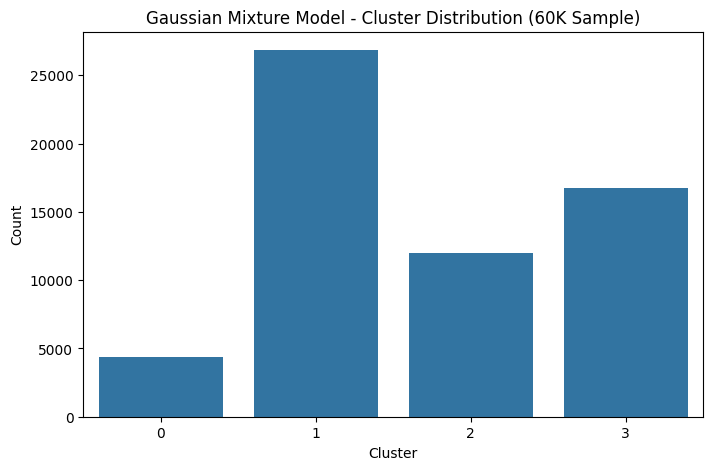

GAUSSIAN MIXTURE MODEL CLUSTER ANALYSIS

📊 GMM CLUSTER 0 PROFILE
Samples: 4347 (7.2% of total)
Average assignment probability: 100.0%
--------------------------------------------------
📅 AGE PROFILE: Average age: 415.4 days (-262.7 days younger than average)
⏱️ TIME TO OUTCOME: 5.9 days (14.6 days shorter than average)

🐾 ANIMAL TYPES:
  • Other: 65.3% (59.6% higher than dataset average)
  • Cat: 18.9% (23.4% lower than dataset average)
  • Dog: 10.1% (41.2% lower than dataset average)

🏁 OUTCOMES:
  • Negative: 63.4% (55.0% higher than dataset average)
  • Neutral: 31.8% (1.8% higher than dataset average)
  • Positive: 4.6% (56.9% lower than dataset average)

🏥 INTAKE CONDITIONS:
  • Normal: 43.5% (40.3% lower than dataset average)
  • Sick: 16.6% (11.7% higher than dataset average)
  • Injured: 13.1% (6.7% higher than dataset average)

📥 INTAKE TYPES:
  • Wildlife: 56.2%
  • Stray: 28.4%
  • Owner Surrender: 5.4%

⚤ SEX DISTRIBUTION:
  • Unknown: 67.5%
  • Intact Male: 15.8%
  • Inta

In [94]:
# Randomly sample 50,000 rows to reduce computational load
df_sampled = df_clustering.sample(n=60000, random_state=42).reset_index(drop=True)

# Select Features for Clustering
numerical_features = ['time_to_outcome_minutes', 'age_days']
categorical_features = ['animal_type', 'Intake Type', 'Intake Condition', 'color_group', 'outcome_group', 'breed_type']

# Preprocessing Pipelines
num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer([
    ('num', num_transformer, numerical_features),
    ('cat', cat_transformer, categorical_features)
])

# Apply preprocessing
X_transformed = preprocessor.fit_transform(df_sampled)
X_array = X_transformed.toarray()

# Perform Gaussian Mixture Clustering
n_components = 4  # Number of clusters
gm = GaussianMixture(n_components=n_components, n_init=10, random_state=42)
gm.fit(X_array)

# Extract Model Parameters
print("Cluster Weights:\n", gm.weights_)
print("\nCluster Means:\n", gm.means_)
print("\nCovariances:\n", gm.covariances_)
print("\nDid the model converge?:", gm.converged_)
print("Number of iterations:", gm.n_iter_)

# Assign Hard Clustering Labels
df_sampled['gmm_cluster'] = gm.predict(X_array)

# Assign Soft Clustering Probabilities
soft_clusters = gm.predict_proba(X_array)
df_sampled['gmm_soft_cluster'] = soft_clusters.max(axis=1)  # Assigns the highest probability per row

# Generate New Synthetic Samples
X_new, y_new = gm.sample(7)
print("\nGenerated Samples:\n", X_new)
print("\nGenerated Sample Labels:\n", y_new)

# Estimate Density at Given Points
density_scores = gm.score_samples(X_array)
df_sampled['density_score'] = density_scores

# Save clustered dataset
df_sampled.to_csv("gmm_clustered_animal_shelter_data.csv", index=False)

# Print Clustered Data Sample
print("\nClustered Data Sample:")
print(df_sampled.head())

# Visualize Cluster Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=df_sampled['gmm_cluster'])
plt.title("Gaussian Mixture Model - Cluster Distribution (60K Sample)")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()

# Calculate cluster insights with percentages and comparisons to overall distribution
overall_animal_dist = df['animal_type'].value_counts(normalize=True) * 100
overall_outcome_dist = df['outcome_group'].value_counts(normalize=True) * 100
overall_intake_dist = df['Intake Condition'].value_counts(normalize=True) * 100
overall_age_mean = df['age_days'].mean()
overall_time_to_outcome = df['time_to_outcome_minutes'].mean() / (24 * 60)  # Convert to days

print("GAUSSIAN MIXTURE MODEL CLUSTER ANALYSIS")
print("=" * 50)

for cluster in range(n_components):
    cluster_data = df_sampled[df_sampled['gmm_cluster'] == cluster]
    cluster_size = len(cluster_data)
    cluster_pct = (cluster_size / len(df_sampled)) * 100
    avg_prob = cluster_data['gmm_soft_cluster'].mean() * 100
    
    print(f"\n📊 GMM CLUSTER {cluster} PROFILE")
    print(f"Samples: {cluster_size} ({cluster_pct:.1f}% of total)")
    print(f"Average assignment probability: {avg_prob:.1f}%")
    print("-" * 50)
    
    # Age analysis
    cluster_age_mean = cluster_data['age_days'].mean()
    age_diff = cluster_age_mean - overall_age_mean
    age_diff_text = f"{age_diff:.1f} days {'older' if age_diff > 0 else 'younger'} than average"
    
    print(f"📅 AGE PROFILE: Average age: {cluster_age_mean:.1f} days ({age_diff_text})")
    
    # Time to outcome analysis
    cluster_time = cluster_data['time_to_outcome_minutes'].mean() / (24 * 60)  # Convert to days
    time_diff = cluster_time - overall_time_to_outcome
    time_diff_text = f"{abs(time_diff):.1f} days {'longer' if time_diff > 0 else 'shorter'} than average"
    print(f"⏱️ TIME TO OUTCOME: {cluster_time:.1f} days ({time_diff_text})")
    
    # Animal type analysis with comparison
    cluster_animal_dist = cluster_data['animal_type'].value_counts(normalize=True) * 100
    print("\n🐾 ANIMAL TYPES:")
    for animal, pct in cluster_animal_dist.head(3).items():
        overall_pct = overall_animal_dist.get(animal, 0)
        diff = pct - overall_pct
        diff_text = f"{abs(diff):.1f}% {'higher' if diff > 0 else 'lower'} than dataset average"
        print(f"  • {animal}: {pct:.1f}% ({diff_text})")
    
    # Outcome analysis with comparison
    cluster_outcome_dist = cluster_data['outcome_group'].value_counts(normalize=True) * 100
    print("\n🏁 OUTCOMES:")
    for outcome, pct in cluster_outcome_dist.head(3).items():
        overall_pct = overall_outcome_dist.get(outcome, 0)
        diff = pct - overall_pct
        diff_text = f"{abs(diff):.1f}% {'higher' if diff > 0 else 'lower'} than dataset average"
        print(f"  • {outcome}: {pct:.1f}% ({diff_text})")
    
    # Intake condition with comparison
    cluster_intake_dist = cluster_data['Intake Condition'].value_counts(normalize=True) * 100
    print("\n🏥 INTAKE CONDITIONS:")
    for condition, pct in cluster_intake_dist.head(3).items():
        overall_pct = overall_intake_dist.get(condition, 0)
        diff = pct - overall_pct
        diff_text = f"{abs(diff):.1f}% {'higher' if diff > 0 else 'lower'} than dataset average"
        print(f"  • {condition}: {pct:.1f}% ({diff_text})")
    
    # Intake type analysis
    intake_dist = cluster_data['Intake Type'].value_counts(normalize=True) * 100
    print("\n📥 INTAKE TYPES:")
    for intake, pct in intake_dist.head(3).items():
        print(f"  • {intake}: {pct:.1f}%")
    
    # Sex distribution
    if 'Sex upon Intake' in cluster_data.columns:
        sex_dist = cluster_data['Sex upon Intake'].value_counts(normalize=True) * 100
        print("\n⚤ SEX DISTRIBUTION:")
        for sex, pct in sex_dist.items():
            print(f"  • {sex}: {pct:.1f}%")
    
    # Breed type analysis
    breed_dist = cluster_data['breed_type'].value_counts(normalize=True) * 100
    print("\n🐕 BREED TYPES:")
    for breed, pct in breed_dist.head(3).items():
        print(f"  • {breed}: {pct:.1f}%")
    
    # Location analysis
    if 'clean_location' in cluster_data.columns:
        top_locations = cluster_data['clean_location'].value_counts(normalize=True).head(3) * 100
        print("\n📍 TOP LOCATIONS:")
        for location, pct in top_locations.items():
            print(f"  • {location}: {pct:.1f}%")
    
    # Color analysis
    color_dist = cluster_data['color_group'].value_counts(normalize=True) * 100
    print("\n🎨 COLOR DISTRIBUTION:")
    for color, pct in color_dist.head(3).items():
        print(f"  • {color}: {pct:.1f}%")
    
    # Density score analysis
    avg_density = cluster_data['density_score'].mean()
    print(f"\n📉 DENSITY SCORE: {avg_density:.2f}")
    
    # Cluster summary
    print("\n🔑 KEY INSIGHTS:")
    # Find distinctive features (highest positive differences from overall)
    distinctive_features = []
    
    # Check animal types
    animal_diffs = [(animal, pct - overall_animal_dist.get(animal, 0)) 
                   for animal, pct in cluster_animal_dist.items()]
    animal_diffs.sort(key=lambda x: x[1], reverse=True)
    if animal_diffs and animal_diffs[0][1] > 5:  # Only if >5% difference
        distinctive_features.append(f"High proportion of {animal_diffs[0][0]}")
    
    # Check outcomes
    outcome_diffs = [(outcome, pct - overall_outcome_dist.get(outcome, 0)) 
                    for outcome, pct in cluster_outcome_dist.items()]
    outcome_diffs.sort(key=lambda x: x[1], reverse=True)
    if outcome_diffs and outcome_diffs[0][1] > 5:
        distinctive_features.append(f"More likely to have {outcome_diffs[0][0]} outcome")
    
    # Age distinctive?
    if abs(age_diff) > (overall_age_mean * 0.2):  # If >20% different from mean
        distinctive_features.append(f"{'Older' if age_diff > 0 else 'Younger'} animals")
    
    # Time to outcome distinctive?
    if abs(time_diff) > (overall_time_to_outcome * 0.2):  # If >20% different
        distinctive_features.append(f"{'Longer' if time_diff > 0 else 'Shorter'} shelter stays")
    
    # Print key insights
    for i, feature in enumerate(distinctive_features[:3]):
        print(f"  • {feature}")
    
    # Suggested actions
    print("\n📋 RECOMMENDED ACTIONS:")
    if "adoption" in str(outcome_diffs[:2]).lower():
        print("  • Analyze successful adoption factors in this cluster")
    elif "transfer" in str(outcome_diffs[:2]).lower():
        print("  • Review transfer partner relationships for these animals")
    elif "euthanasia" in str(outcome_diffs[:2]).lower():
        print("  • Develop targeted intervention programs for similar animals")
    
    if age_diff > 0:
        print("  • Consider special programs for older animals in this group")
    
    if time_diff > 0:
        print("  • Investigate factors contributing to longer shelter stays")
    
    print("=" * 50)

## Affinity propagation


✅ Affinity Propagation found 276 clusters.

Clustered Data Sample:
  Animal ID      Date_of_Intake Intake Type Intake Condition Sex upon Intake  \
0   A824437 2020-10-14 14:28:00       Stray           Normal   Intact Female   
1   A515453 2017-08-07 14:23:00       Stray           Normal   Neutered Male   
2   A772170 2018-05-15 15:12:00       Stray           Normal   Spayed Female   
3   A819709 2020-07-04 13:34:00       Stray           Normal   Intact Female   
4   A716634 2015-11-22 13:06:00       Stray           Normal   Intact Female   

      Date_of_Outcome animal_type Sex upon Outcome Age upon Outcome  \
0 2020-10-21 18:39:00         Dog    Spayed Female           1 year   
1 2017-08-07 17:12:00         Dog    Neutered Male         10 years   
2 2018-05-16 17:05:00         Dog    Spayed Female           1 year   
3 2020-07-04 07:37:00         Cat    Intact Female          2 weeks   
4 2015-12-19 18:44:00         Cat    Intact Female         2 months   

                        

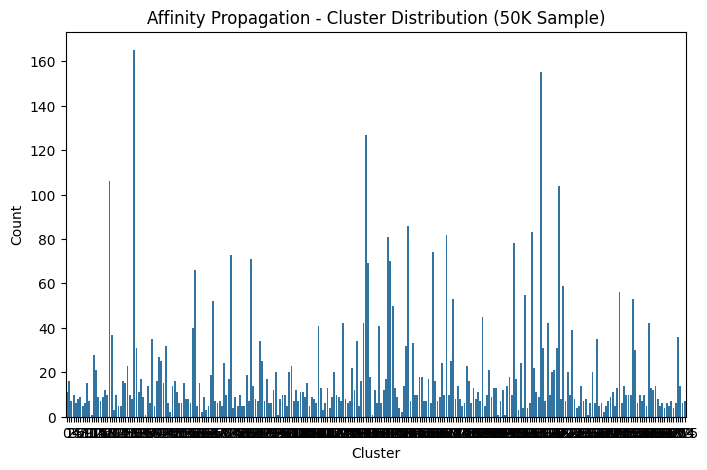

AFFINITY PROPAGATION CLUSTER ANALYSIS
Analysis of top 5 clusters out of 276 total clusters

📊 AFFINITY CLUSTER 30 PROFILE
Samples: 165 (3.3% of total)
--------------------------------------------------
📅 AGE PROFILE: Average age: 213.0 days (-465.0 days younger than average)
⏱️ TIME TO OUTCOME: 12.6 days (7.9 days shorter than average)

🐾 ANIMAL TYPES:
  • Dog: 98.8% (47.4% higher than dataset average)
  • Bird: 1.2% (0.6% higher than dataset average)

🏁 OUTCOMES:
  • Positive: 100.0% (38.5% higher than dataset average)

🏥 INTAKE CONDITIONS:
  • Normal: 100.0% (16.2% higher than dataset average)

📥 INTAKE TYPES:
  • Stray: 100.0%

⚤ SEX DISTRIBUTION:
  • Intact Male: 47.3%
  • Intact Female: 41.2%
  • Spayed Female: 5.5%
  • Neutered Male: 4.8%
  • Unknown: 1.2%

🐕 BREED TYPES:
  • Mix: 100.0%

📍 TOP LOCATIONS:
  • Austin (TX): 82.4%
  • Travis (TX): 13.3%
  • Manor (TX): 2.4%

🎨 COLOR DISTRIBUTION:
  • White: 98.8%
  • Other: 1.2%

🔑 KEY INSIGHTS:
  • High proportion of Dog
  • More l

In [93]:
# Randomly sample 50,000 rows to reduce computational load
df_sampled = df_clustering.sample(n=5000, random_state=42).reset_index(drop=True)

# Select Features for Clustering
numerical_features = ['time_to_outcome_minutes', 'age_days']
categorical_features = ['animal_type', 'Intake Type', 'Intake Condition', 'color_group', 'outcome_group', 'breed_type']

# Preprocessing Pipelines
num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer([
    ('num', num_transformer, numerical_features),
    ('cat', cat_transformer, categorical_features)
])

# Apply preprocessing
X_transformed = preprocessor.fit_transform(df_sampled)
X_array = X_transformed.toarray()

# Perform Affinity Propagation Clustering
affinity_propagation = AffinityPropagation(damping=0.9, random_state=42)
df_sampled['affinity_cluster'] = affinity_propagation.fit_predict(X_array)

# Extract the number of clusters dynamically
num_clusters = len(np.unique(df_sampled['affinity_cluster']))
print(f"\n✅ Affinity Propagation found {num_clusters} clusters.")

# Save clustered dataset
df_sampled.to_csv("affinity_propagation_clustered_animal_shelter_data.csv", index=False)

# Print Clustered Data Sample
print("\nClustered Data Sample:")
print(df_sampled.head())

# Visualize Cluster Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=df_sampled['affinity_cluster'])
plt.title("Affinity Propagation - Cluster Distribution (50K Sample)")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()

# Calculate cluster insights with percentages and comparisons to overall distribution
overall_animal_dist = df['animal_type'].value_counts(normalize=True) * 100
overall_outcome_dist = df['outcome_group'].value_counts(normalize=True) * 100
overall_intake_dist = df['Intake Condition'].value_counts(normalize=True) * 100
overall_age_mean = df['age_days'].mean()
overall_time_to_outcome = df['time_to_outcome_minutes'].mean() / (24 * 60)  # Convert to days

print("AFFINITY PROPAGATION CLUSTER ANALYSIS")
print("=" * 50)

# Get the unique clusters from the data
unique_clusters = df_sampled['affinity_cluster'].unique()

# Sort clusters by size (descending)
cluster_sizes = df_sampled['affinity_cluster'].value_counts().sort_values(ascending=False)
top_clusters = cluster_sizes.index[:min(5, len(cluster_sizes))]  # Get top 5 or fewer

print(f"Analysis of top {len(top_clusters)} clusters out of {len(unique_clusters)} total clusters")
print("=" * 50)

for cluster in top_clusters:
    cluster_data = df_sampled[df_sampled['affinity_cluster'] == cluster]
    cluster_size = len(cluster_data)
    cluster_pct = (cluster_size / len(df_sampled)) * 100
    
    print(f"\n📊 AFFINITY CLUSTER {cluster} PROFILE")
    print(f"Samples: {cluster_size} ({cluster_pct:.1f}% of total)")
    print("-" * 50)
    
    # Age analysis
    cluster_age_mean = cluster_data['age_days'].mean()
    age_diff = cluster_age_mean - overall_age_mean
    age_diff_text = f"{age_diff:.1f} days {'older' if age_diff > 0 else 'younger'} than average"
    
    print(f"📅 AGE PROFILE: Average age: {cluster_age_mean:.1f} days ({age_diff_text})")
    
    # Time to outcome analysis
    cluster_time = cluster_data['time_to_outcome_minutes'].mean() / (24 * 60)  # Convert to days
    time_diff = cluster_time - overall_time_to_outcome
    time_diff_text = f"{abs(time_diff):.1f} days {'longer' if time_diff > 0 else 'shorter'} than average"
    print(f"⏱️ TIME TO OUTCOME: {cluster_time:.1f} days ({time_diff_text})")
    
    # Animal type analysis with comparison
    cluster_animal_dist = cluster_data['animal_type'].value_counts(normalize=True) * 100
    print("\n🐾 ANIMAL TYPES:")
    for animal, pct in cluster_animal_dist.head(3).items():
        overall_pct = overall_animal_dist.get(animal, 0)
        diff = pct - overall_pct
        diff_text = f"{abs(diff):.1f}% {'higher' if diff > 0 else 'lower'} than dataset average"
        print(f"  • {animal}: {pct:.1f}% ({diff_text})")
    
    # Outcome analysis with comparison
    cluster_outcome_dist = cluster_data['outcome_group'].value_counts(normalize=True) * 100
    print("\n🏁 OUTCOMES:")
    for outcome, pct in cluster_outcome_dist.head(3).items():
        overall_pct = overall_outcome_dist.get(outcome, 0)
        diff = pct - overall_pct
        diff_text = f"{abs(diff):.1f}% {'higher' if diff > 0 else 'lower'} than dataset average"
        print(f"  • {outcome}: {pct:.1f}% ({diff_text})")
    
    # Intake condition with comparison
    cluster_intake_dist = cluster_data['Intake Condition'].value_counts(normalize=True) * 100
    print("\n🏥 INTAKE CONDITIONS:")
    for condition, pct in cluster_intake_dist.head(3).items():
        overall_pct = overall_intake_dist.get(condition, 0)
        diff = pct - overall_pct
        diff_text = f"{abs(diff):.1f}% {'higher' if diff > 0 else 'lower'} than dataset average"
        print(f"  • {condition}: {pct:.1f}% ({diff_text})")
    
    # Intake type analysis
    intake_dist = cluster_data['Intake Type'].value_counts(normalize=True) * 100
    print("\n📥 INTAKE TYPES:")
    for intake, pct in intake_dist.head(3).items():
        print(f"  • {intake}: {pct:.1f}%")
    
    # Sex distribution
    if 'Sex upon Intake' in cluster_data.columns:
        sex_dist = cluster_data['Sex upon Intake'].value_counts(normalize=True) * 100
        print("\n⚤ SEX DISTRIBUTION:")
        for sex, pct in sex_dist.items():
            print(f"  • {sex}: {pct:.1f}%")
    
    # Breed type analysis
    breed_dist = cluster_data['breed_type'].value_counts(normalize=True) * 100
    print("\n🐕 BREED TYPES:")
    for breed, pct in breed_dist.head(3).items():
        print(f"  • {breed}: {pct:.1f}%")
    
    # Location analysis
    if 'clean_location' in cluster_data.columns:
        top_locations = cluster_data['clean_location'].value_counts(normalize=True).head(3) * 100
        print("\n📍 TOP LOCATIONS:")
        for location, pct in top_locations.items():
            print(f"  • {location}: {pct:.1f}%")
    
    # Color analysis
    color_dist = cluster_data['color_group'].value_counts(normalize=True) * 100
    print("\n🎨 COLOR DISTRIBUTION:")
    for color, pct in color_dist.head(3).items():
        print(f"  • {color}: {pct:.1f}%")
    
    # Cluster summary
    print("\n🔑 KEY INSIGHTS:")
    # Find distinctive features (highest positive differences from overall)
    distinctive_features = []
    
    # Check animal types
    animal_diffs = [(animal, pct - overall_animal_dist.get(animal, 0)) 
                   for animal, pct in cluster_animal_dist.items()]
    animal_diffs.sort(key=lambda x: x[1], reverse=True)
    if animal_diffs and animal_diffs[0][1] > 5:  # Only if >5% difference
        distinctive_features.append(f"High proportion of {animal_diffs[0][0]}")
    
    # Check outcomes
    outcome_diffs = [(outcome, pct - overall_outcome_dist.get(outcome, 0)) 
                    for outcome, pct in cluster_outcome_dist.items()]
    outcome_diffs.sort(key=lambda x: x[1], reverse=True)
    if outcome_diffs and outcome_diffs[0][1] > 5:
        distinctive_features.append(f"More likely to have {outcome_diffs[0][0]} outcome")
    
    # Age distinctive?
    if abs(age_diff) > (overall_age_mean * 0.2):  # If >20% different from mean
        distinctive_features.append(f"{'Older' if age_diff > 0 else 'Younger'} animals")
    
    # Time to outcome distinctive?
    if abs(time_diff) > (overall_time_to_outcome * 0.2):  # If >20% different
        distinctive_features.append(f"{'Longer' if time_diff > 0 else 'Shorter'} shelter stays")
    
    # Print key insights
    for i, feature in enumerate(distinctive_features[:3]):
        print(f"  • {feature}")
    
    # Suggested actions
    print("\n📋 RECOMMENDED ACTIONS:")
    if "adoption" in str(outcome_diffs[:2]).lower():
        print("  • Analyze successful adoption factors in this cluster")
    elif "transfer" in str(outcome_diffs[:2]).lower():
        print("  • Review transfer partner relationships for these animals")
    elif "euthanasia" in str(outcome_diffs[:2]).lower():
        print("  • Develop targeted intervention programs for similar animals")
    
    if age_diff > 0:
        print("  • Consider special programs for older animals in this group")
    
    if time_diff > 0:
        print("  • Investigate factors contributing to longer shelter stays")
    
    print("=" * 50)

# Show cluster distribution table with percentages
cluster_distribution = df_sampled['affinity_cluster'].value_counts().reset_index()
cluster_distribution.columns = ['Cluster', 'Count']
cluster_distribution['Percentage'] = cluster_distribution['Count'] / len(df_sampled) * 100

print("\nCLUSTER SIZE DISTRIBUTION")
print("-" * 25)
print(f"Top 5 clusters (out of {len(unique_clusters)} total):")
for _, row in cluster_distribution.head(5).iterrows():
    print(f"Cluster {row['Cluster']}: {row['Count']} samples ({row['Percentage']:.1f}%)")

# Calculate how many samples are in the "other" clusters
other_samples = cluster_distribution.iloc[5:]['Count'].sum() if len(cluster_distribution) > 5 else 0
other_percentage = other_samples / len(df_sampled) * 100 if len(df_sampled) > 0 else 0
print(f"Other {len(unique_clusters) - 5} clusters: {other_samples} samples ({other_percentage:.1f}%)")